In [245]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

**Lendo o CSV de algum ação usando pandas**


In [264]:
df = pd.read_excel('PETR4.xlsx')

**Apagando todos valores nulos**

In [265]:
df.dropna(inplace=True)

**Plotando o histórico de preços de fechamento usando matplotlib**

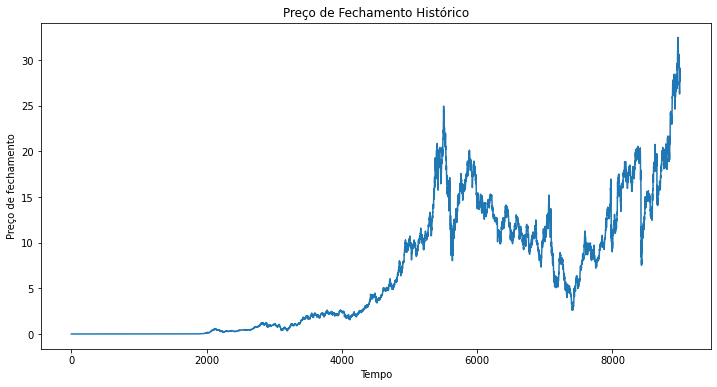

In [269]:
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title('Preço de Fechamento Histórico')
plt.plot(df['close'])
plt.xlabel('Tempo',fontsize=10)
plt.ylabel('Preço de fechamento',fontsize=10)
plt.show()

In [270]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)

In [271]:
scale = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scale.fit_transform(dataset)

In [272]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

**Dividindo dados para treinamento e teste**

In [273]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [274]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

**Construindo um Modelo LSTM para Previsão do Mercado de Ações**

In [275]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

**Usando o otimizador adam e o erro_quadrático_médio como a função de perda**

In [276]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [277]:
model.fit(x_train, y_train, batch_size=64, epochs=1)

112/112 [==============================] - 11s 64ms/step - loss: 0.0020


In [278]:
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [279]:
x_test = np.array(x_test)

In [280]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [281]:
predictions = model.predict(x_test) 
predictions = scale.inverse_transform(predictions)

**Encontrando a raiz do erro quadrático médio**

In [282]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.0131818482760109

**Plotando os valores previstos**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


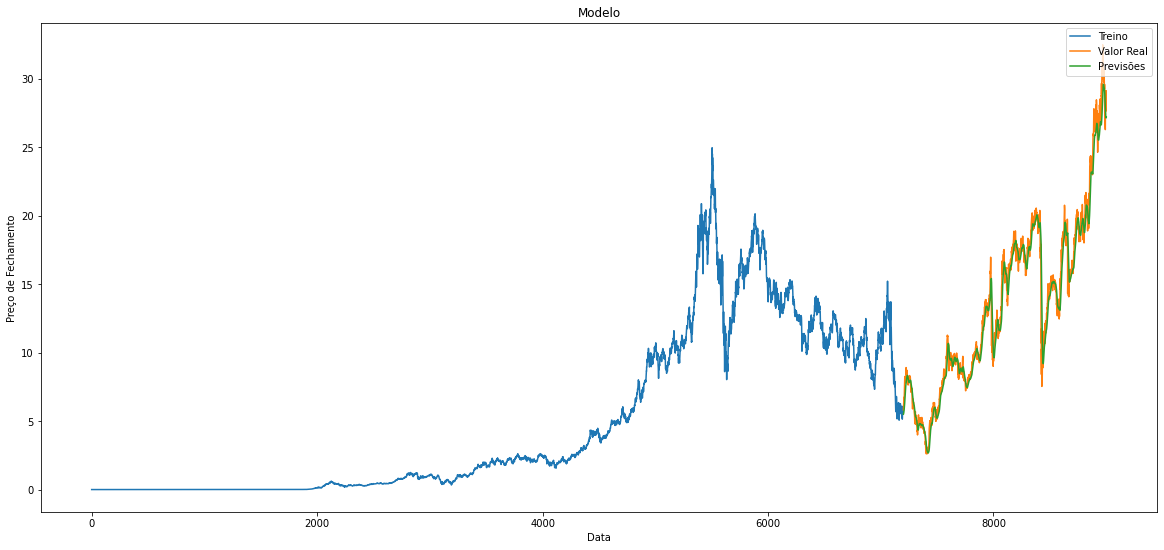

In [284]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(20,9))
plt.title('Modelo')
plt.xlabel('Data', fontsize=10)
plt.ylabel('Preço de Fechamento', fontsize=10)
plt.plot(train['close'])
plt.plot(display['close'])
plt.plot(display['Predictions'])
plt.legend(['Treino', 'Valor Real', 'Previsões'], loc='upper right')
plt.show()